In [110]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from glob import iglob
import numpy as np
from imageio import imread
from sklearn.metrics import mean_squared_error
from numpy import mean

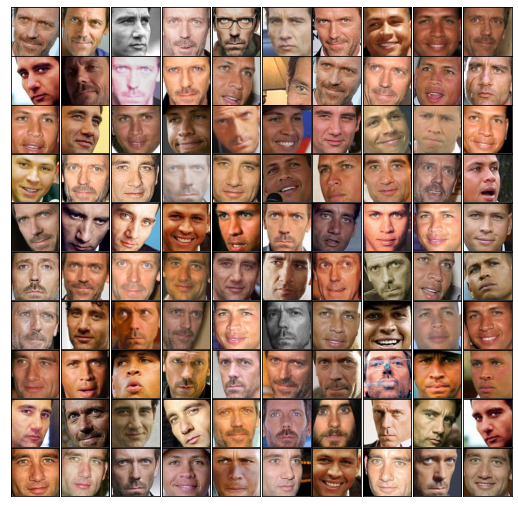

In [112]:
color_faces = pd.DataFrame([])
for path in iglob('/gdrive/My Drive/dataset/*.jpg'):
#     print (path)
    img=imread(path)
    color_face = pd.Series(img.flatten(),name=path)
    color_faces = color_faces.append(color_face)
    
fig, axes = plt.subplots(10,10,figsize=(9,9),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(color_faces.iloc[i].values.reshape(256, 256, 3).astype('uint8'), cmap='gray')

In [0]:
faces = pd.DataFrame([])
i=1
for path in iglob('./dataset/*.jpg'):
    img = Image.open(path).convert('LA')
    img_name= ((path.split('/')[-1]).split('.')[0])+".png"
    img.save('./grays/'+img_name)
    i +=1

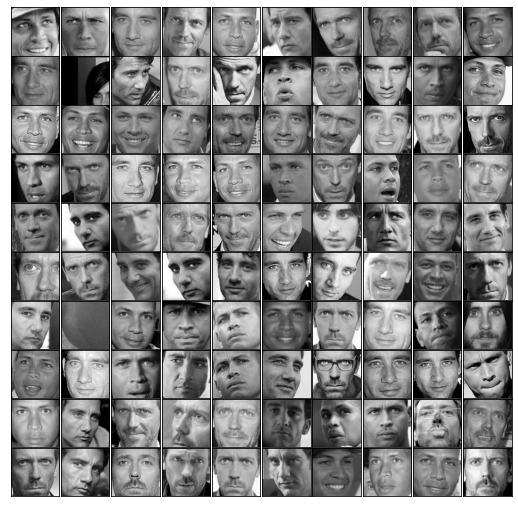

In [115]:
faces = pd.DataFrame([])
for path in iglob('/gdrive/My Drive/grays/*.png'):
#     print (path)
    img=imread(path)
    face = pd.Series(img.flatten(),name=path)
    faces = faces.append(face)

fig, axes = plt.subplots(10,10,figsize=(9,9),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.iloc[i].values.reshape(256, 256, 4).astype('uint8'), cmap='gray')

In [116]:
import cv2
from glob import iglob
color_faces= pd.DataFrame([])
faces = pd.DataFrame([])
for path in iglob('/gdrive/My Drive/grays/*.png'):
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    scale_percent = 60 # percent of original size
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    gray = cv2.resize(gray, dim,interpolation = cv2.INTER_NEAREST)
    face = pd.Series(gray.flatten(),name=path)
    faces = faces.append(face)

(200, 23409)


In [117]:
approximation= []
for i in range(2, 40, 4):
  approximation.append(i)

10


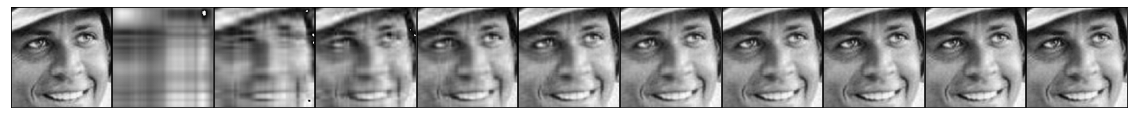

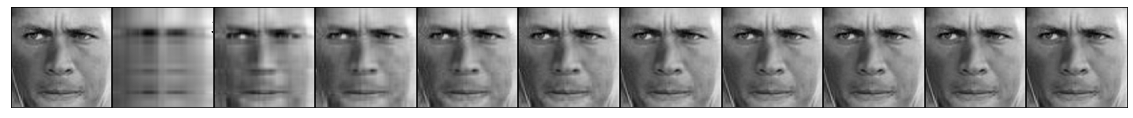

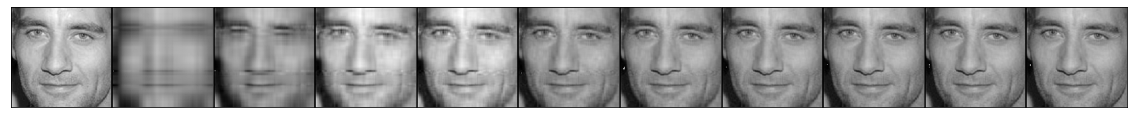

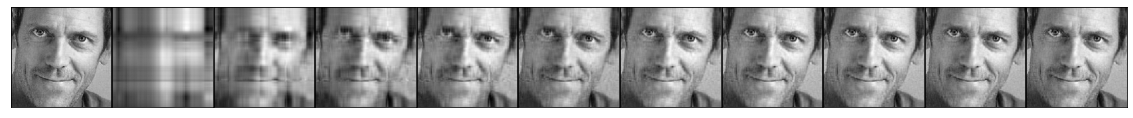

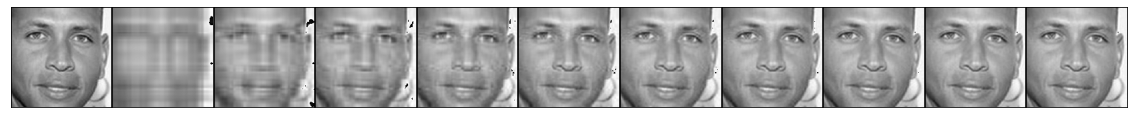

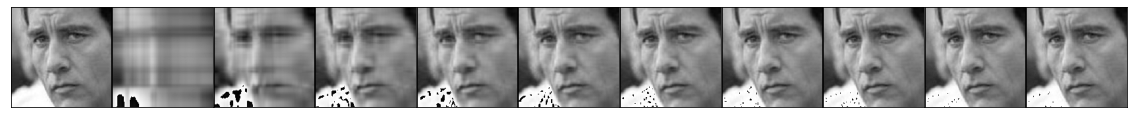

In [118]:
count= 0
total_error= []
for i in range (len(faces)):
    pictures= pd.DataFrame([])
    error =[]
    gray= faces.iloc[i].values.reshape(153, 153).astype('uint8')
    U, S, VT= np.linalg.svd(gray, full_matrices= False)
    S= np.diag(S)
    face = pd.Series(gray.flatten(),name=path)
    pictures= pictures.append(face)

    for r in approximation:
        approx= U[:,:r]@ S[0:r,:r]@ VT[:r,:]
        face= pd.Series(approx.flatten(),name=path)
        pictures= pictures.append(face)
        error.append(mean_squared_error(gray, approx))
    if(count< 6):
      fig, axes = plt.subplots(1,11,figsize=(20,20),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.01, wspace=0.01))
      for k, ax in enumerate(axes.flat):
          ax.imshow(pictures.iloc[k].values.reshape(153, 153).astype('uint8'), cmap='gray')
    count +=1
    total_error.append(error)

In [119]:
total_error= np.asarray(total_error)

[[1297.5326051631944, 343.2982850309773, 135.0449651591144, 62.4426127632353, 35.16107897227801, 18.749261203758756, 11.64904230578368, 7.422782328432103, 4.517990051093414, 2.735976555270503], [338.4507301057222, 99.12141221616919, 45.672597110415445, 24.88455168639053, 13.613967159759305, 7.385959644385182, 4.123440930409699, 2.301859311744354, 1.2796905271850851, 0.761425492999324], [347.79955273005476, 118.56556697915086, 69.13847672475018, 45.29284511940752, 31.18992228384144, 22.12378082959282, 16.082493063628036, 12.117806003024148, 9.083707162409908, 6.867558174879647], [771.4840705668361, 231.88828497345236, 147.4746921426145, 104.66102498613313, 78.66567127750616, 61.48382773617182, 49.42875633990656, 39.97081447898754, 32.67223044412765, 26.823996602660326], [484.7325866274989, 175.79712475550573, 88.9502545774874, 49.47428214838378, 28.280691627836188, 16.267750712811868, 9.538231140127547, 5.846799291799417, 3.6537739671919405, 2.399644189357056], [856.4730886030973, 152.1

In [120]:
M = mean(total_error.T, axis=1)
print (M)
for i in range (len(M)):
  M[i] = M[i]/200
  M[i] = M[i]*100

(200, 10)
[655.38801919 199.08865619  99.88383717  59.55103644  39.03018507
  27.04449046  19.41060819  14.2626094   10.665423     8.09966376]
[327.6940096   99.54432809  49.94191859  29.77551822  19.51509254
  13.52224523   9.7053041    7.1313047    5.3327115    4.04983188]
(10,)


[2, 6, 10, 14, 18, 22, 26, 30, 34, 38]


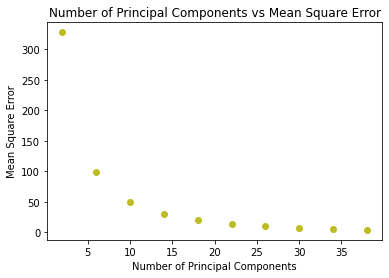

In [121]:
plt.scatter(approximation, M, c='#bcbd22')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Square Error')
plt.title('Number of Principal Components vs Mean Square Error')
plt.show()

In [0]:
from google.colab import drive
drive.mount('/content/drive')